# Chapter 7.3: Higgs Decay into an on-shell $W^+ W^-$

Coupling: $g_{HVV} = -2i g^{\mu\nu} M_V^2/v$

Compute the decay width $\Gamma(H\to W^+W^-)$ (eq. 7.96 in the book) with sympy.

In [1]:
import heppackv0 as hep
import sympy as sy

Reading heppackv0.py (March 2023)

Done


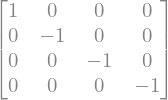

In [2]:
# M = Higgs mass, m = W-boson mass, v=246 GeV
# Use Dm instead of E to ensure that arguments of sqrts are always positiv
# Later replace Dm --> M/2-m
M,m,Dm,v = sy.symbols("M,m,Dm,v" , positive=True, real=True) 
gmunu = sy.diag(1,-1,-1,-1)
gmunu

In [3]:
pW1 = [Dm+m, m, 0, 0] # V1
pW2 = [Dm+m, m, sy.pi, sy.pi] # V2

In [4]:
# Matrix element H-> VV
# hf, ha: helicities of fermion and anti-fermion
def mel(pW1, pW2, hW1, hW2):
    pre = -2*sy.I*m**2/v # HWW coupling
    me = sy.Rational(0)
    polW1 = hep.polbar(pW1,hW1)
    polW2 = hep.polbar(pW2,hW2)
    for mu in range(4):
        me = me + polW1[mu]*polW2[mu]*gmunu[mu,mu]
    return sy.trigsimp(sy.simplify(pre*me))

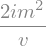

In [5]:
mel(pW1,pW2,-1,-1)

In [6]:
def mel2(pW1, pW2, showAmplitude=True):
    """ 
    Calculate spin averaged matrix element of Higgs decay to a V-pair 
    """    
    if showAmplitude: print("hW1  hW2")
    hels   = (-1, 0, 1)
    me2sum = 0
    for hW1 in hels:
        for hW2 in hels:         
            me     = mel(pW1, pW2, hW1, hW2)
            me2    = me*me.conjugate()
            me2sum += me2
            me2sum =  sy.simplify(me2sum)

            if showAmplitude:
                sh = "{0:2}   {1:2} ".format(hW1,hW2)
                sme2 = me.subs(Dm, M/2-m)
                sme3 = sy.simplify(sme2)
                print(sh, sme3)
    sme2sum = sy.simplify(me2sum.subs(Dm, M/2-m))
    return sme2sum

hW1  hW2
-1   -1  2*I*m**2/v
-1    0  0
-1    1  0
 0   -1  0
 0    0  I*(-M**2 + 2*m**2)/v
 0    1  0
 1   -1  0
 1    0  0
 1    1  2*I*m**2/v
mel2HVV:  (8*m**4 + (M**2 - 2*m**2)**2)/v**2


'Gamma: '

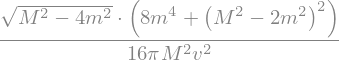

In [7]:
# apply factors  
mel2HWW = mel2(pW1, pW2, showAmplitude=True)
print("mel2HVV: ", mel2HWW)
pre2= sy.sqrt(M**2/4 - m**2) /(8*sy.pi*M**2)
Gamma = sy.simplify(pre2*mel2HWW)
display("Gamma: ", Gamma)

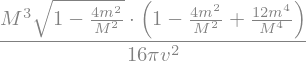

In [8]:
# compare to Book, eq. 7.96
betaW = sy.sqrt(1-4*m**2/M**2)
x = m**2/M**2
GammaBook = M**3*betaW*(1-4*x+12*x**2)/(16*sy.pi*v**2)
GammaBook

<hr style="width:100%;height:2px;color:black">

In [9]:
# test equality
sy.simplify(Gamma-GammaBook)